[74.0, 170.0, 2740.0, 3051.0, 2416.0, 2479.0, 3016.0, 2963.0, 2942.0, 2603.0, 2603.0, 2915.0, 2863.0, 2806.0, 2775.0, 2181.0, 3786.0, 4265.0, 3842.0, 3795.0, 3738.0, 3327.0, 2057.0, 3358.0, 2564.0, 3918.0, 1785.0, 1782.0, 3033.0, 3077.0, 2989.0, 1485.0, 3469.0, 3310.0, 1661.0, 2160.0, 1323.0, 1323.0, 1586.0, 1160.0, 2838.0, 2910.0, 1304.0, 1035.0, 1183.0, 1196.0, 1275.0, 3531.0, 981.0, 2783.0, 2689.0, 1178.0, 2194.0, 1724.0, 1722.0, 1721.0, 1409.0, 1378.0, 3049.0, 2554.0, 2110.0, 1277.0, 880.0, 1112.0, 825.0, 1092.0, 783.0, 783.0, 1080.0, 771.0, 2163.0, 3339.0, 2457.0, 1037.0, 1139.0, 1471.0, 2726.0, 3297.0, 1006.0, 985.0, 1365.0, 1120.0, 2123.0, 2463.0, 1332.0, 689.0, 633.0, 2321.0, 1802.0, 1802.0, 369.0, 2703.0, 2367.0, 396.0, 861.0, 2036.0, 1166.0, 673.0, 1775.0, 2383.0, 2771.0, 2598.0, 403.0, 494.0, 2349.0, 937.0, 2691.0, 2271.0, 1099.0, 748.0, 1732.0, 2476.0, 2476.0, 1714.0, 1423.0, 2428.0, 515.0, 2216.0, 469.0, 614.0, 1181.0, 1605.0, 2166.0, 1435.0, 976.0, 183.0, 1062.0, 231.0, 1

/tmp/ipykernel_3164/3551413233.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gag_time_over_issue_date_df__year = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).mean()


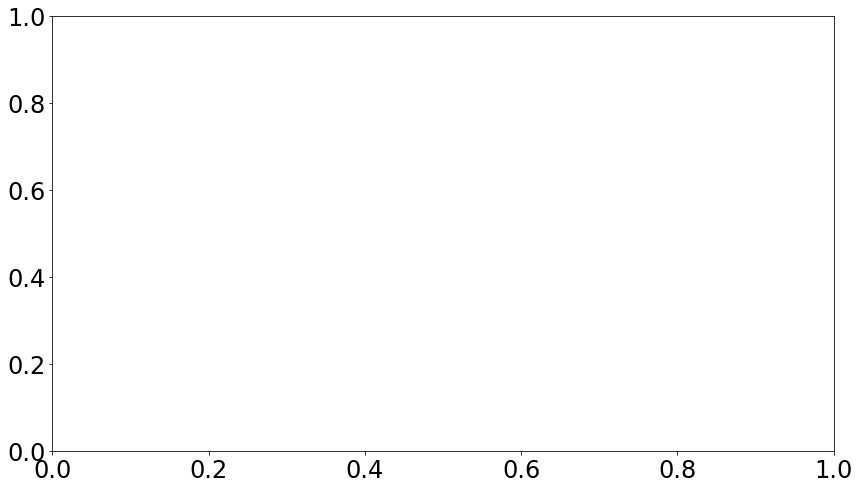

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

EXTRACTED_DATA_PATH = "../../data/extracted"
OUTPUT_DATA_DIR = "../../data/processed"

colors = plt.cm.get_cmap('hsv', 50)

# Read data
csv_google = pd.read_csv(f'{EXTRACTED_DATA_PATH}/nsl_letters_google.csv')
csv_apple = pd.read_csv(f'{EXTRACTED_DATA_PATH}/nsl_letters_apple.csv')
csv_nslarchive = pd.read_csv(f'{EXTRACTED_DATA_PATH}/nsl_letters_nslarchive.csv')
csv = pd.concat([csv_google, csv_apple, csv_nslarchive])

# earlier date when the letter is served
csv['nsl_issue_dates'] = nsl_issue_dates = [datetime.strptime(val, "%Y-%m-%d") for val in csv['issue date'].values]

# later date when the letter is published
csv['nsl_release_dates'] = nsl_release_dates = [datetime.strptime(val, "%Y-%m-%d") for val in csv['release date'].values]

# proxy for gag order time: difference between issue and release dates
gag_time = [(nsl_release_dates[i] - nsl_issue_dates[i]).days for i in range(len(nsl_release_dates))]

# Sort nsls by issue dates
nsl_issue_dates_zip_gag_time = zip(nsl_issue_dates, gag_time)
nsl_issue_dates_zip_gag_time_s = sorted(nsl_issue_dates_zip_gag_time, key=lambda x: x[0])
nsl_issue_dates_s, gag_time_s = zip(*nsl_issue_dates_zip_gag_time_s)
gag_time_s = [float(ss) for ss in gag_time_s]
print(gag_time_s)

# Create pandas frame for the inferred gag time over issue dates 
gag_time_over_issue_date_df = pd.DataFrame({'nsl_issue_dates' : nsl_issue_dates_s, 'gag_time' : gag_time_s}, columns=['nsl_issue_dates', 'gag_time'])

# Aggregate the data per year, compute the mean, minimum, and maximum for every year
gag_time_over_issue_date_df__year = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).mean()
print(gag_time_over_issue_date_df__year)
gag_time_over_issue_date_df__year_min = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).min()
gag_time_over_issue_date_df__year_max = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).max()

# Plot the gag order time
plt.rc("axes", axisbelow=True)
plt.rcParams["font.size"] = 24
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["figure.figsize"] = (14,8)
plt.ticklabel_format(style='plain')

/tmp/ipykernel_3164/3953741625.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar([datetime(v, 6, 1) for v in gag_time_over_issue_date_df__year.index.values], gag_time_over_issue_date_df__year['gag_time'].values.tolist(),


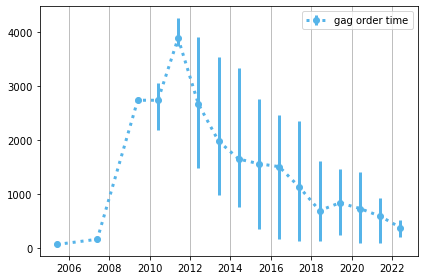

In [3]:
# Paper plot

plt.errorbar([datetime(v, 6, 1) for v in gag_time_over_issue_date_df__year.index.values], gag_time_over_issue_date_df__year['gag_time'].values.tolist(),
   yerr =  (np.array(gag_time_over_issue_date_df__year['gag_time' ].values.tolist()) - np.array(gag_time_over_issue_date_df__year_min['gag_time'].values.tolist()),
            np.array(gag_time_over_issue_date_df__year_max['gag_time' ].values.tolist()) - np.array(gag_time_over_issue_date_df__year['gag_time'].values.tolist())),
   linestyle='dotted', marker='o', label="gag order time", color="#56b4e9", fmt='o', elinewidth=3, linewidth=3)

plt.grid(True, which="major")
plt.grid(True, which="minor")
plt.grid(axis="y")
plt.legend()                                                                                                                                                                        
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.tight_layout()
plt.savefig(f"{OUTPUT_DATA_DIR}/mean_gag_time_over_time_yearly_date_let__errorbar.pdf")
plt.savefig(f"{OUTPUT_DATA_DIR}/mean_gag_time_over_time_yearly_date_let__errorbar.png")

/tmp/ipykernel_3164/1646004744.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar([datetime(v, 6, 1) for v in gag_time_over_issue_date_df__year.index.values], gag_time_over_issue_date_df__year['gag_time'].values.tolist(),


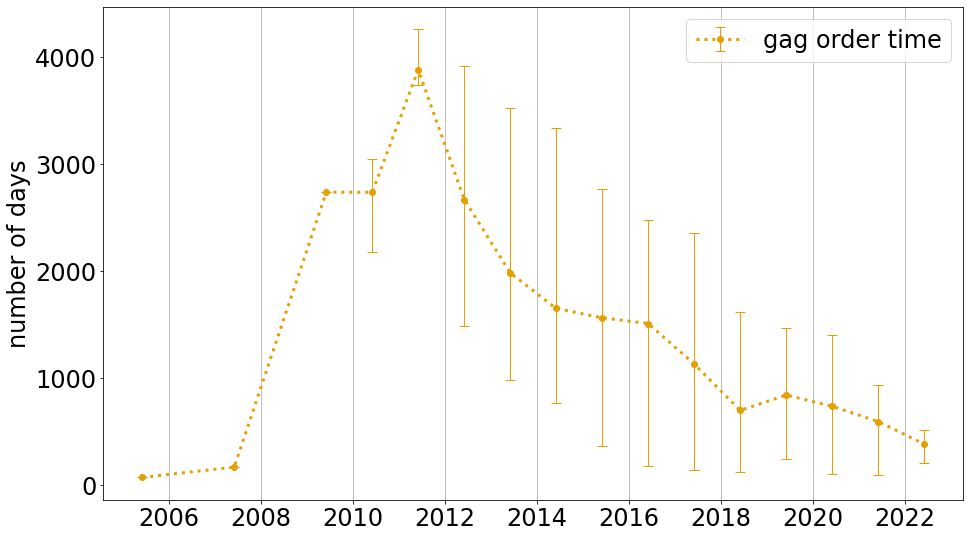

In [12]:
# Presentation plot

# Plot the gag order time
plt.rc("axes", axisbelow=True)
plt.rcParams["font.size"] = 24
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["figure.figsize"] = (14,8)
plt.ticklabel_format(style='plain')

plt.errorbar([datetime(v, 6, 1) for v in gag_time_over_issue_date_df__year.index.values], gag_time_over_issue_date_df__year['gag_time'].values.tolist(),
   yerr =  (np.array(gag_time_over_issue_date_df__year['gag_time' ].values.tolist()) - np.array(gag_time_over_issue_date_df__year_min['gag_time'].values.tolist()),
            np.array(gag_time_over_issue_date_df__year_max['gag_time' ].values.tolist()) - np.array(gag_time_over_issue_date_df__year['gag_time'].values.tolist())),
   linestyle='dotted', marker='o', label="gag order time", color="#e69f00", fmt='o', elinewidth=1, linewidth=3, capsize=5)

plt.grid(True, which="major")
plt.grid(True, which="minor")
plt.grid(axis="y")
plt.xlabel("issuance date")
plt.ylabel("number of days")
plt.legend()    
plt.tight_layout()
plt.savefig(f"{OUTPUT_DATA_DIR}/mean_gag_time_over_time_yearly_date_let__errorbar.pdf")
plt.savefig(f"{OUTPUT_DATA_DIR}/mean_gag_time_over_time_yearly_date_let__errorbar.png")